In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('uq_vsd_case01_fulldata_13.csv', on_bad_lines='skip')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time                              1633 non-null   object 
 1   RelativeTimeMilliseconds          1633 non-null   int64  
 2   Clock                             1633 non-null   object 
 3   HR                                1510 non-null   float64
 4   ST-II                             0 non-null      float64
 5   Pulse                             1633 non-null   int64  
 6   SpO2                              1633 non-null   int64  
 7   Perf                              1633 non-null   float64
 8   etCO2                             1633 non-null   int64  
 9   imCO2                             1633 non-null   int64  
 10  awRR                              1633 non-null   int64  
 11  NBP (Sys)                         1633 non-null   int64  
 12  NBP (D

In [4]:
df = df.drop(columns=['Time', 'Clock'])

In [5]:
df

,RelativeTimeMilliseconds,HR,ST-II,Pulse,SpO2,Perf,etCO2,imCO2,awRR,NBP (Sys),...,EEG,AWP,AWF,AWV,AWP-Spiro,AWF-Spiro,AWV-Spiro,Num Patient Alarms,Num Technical Alarms,Alarms...
0,7200000,51.0,NaN,51,98,3.0,39,1,7,94,...,NaN,8.20354,43.02551,630.2,NaN,NaN,NaN,0,0,NaN
1,7200010,51.0,NaN,51,98,3.0,39,1,7,94,...,NaN,8.18365,43.15805,637.4,NaN,NaN,NaN,0,0,NaN
2,7200020,51.0,NaN,51,98,3.0,39,1,7,94,...,NaN,8.16036,42.97751,644.6,NaN,NaN,NaN,0,0,NaN
3,7200030,51.0,NaN,51,98,3.0,39,1,7,94,...,NaN,8.16700,42.43487,651.6,NaN,NaN,NaN,0,0,NaN
4,7200040,51.0,NaN,51,98,3.0,39,1,7,94,...,NaN,8.13787,42.65852,658.7,NaN,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,7216280,NaN,NaN,51,99,1.3,39,1,6,103,...,NaN,1.09375,0.01543,-0.7,NaN,NaN,NaN,0,0,NaN
1629,7216290,NaN,NaN,51,99,1.3,39,1,6,103,...,NaN,1.09278,-0.00768,-0.7,NaN,NaN,NaN,0,0,NaN
1630,7216300,NaN,NaN,51,99,1.3,39,1,6,103,...,NaN,1.08844,-0.00264,-0.7,NaN,NaN,NaN,0,0,NaN
1631,7216310,NaN,NaN,51,99,1.3,39,1,6,103,...,NaN,1.10604,0.00000,-0.7,NaN,NaN,NaN,0,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RelativeTimeMilliseconds          1633 non-null   int64  
 1   HR                                1510 non-null   float64
 2   ST-II                             0 non-null      float64
 3   Pulse                             1633 non-null   int64  
 4   SpO2                              1633 non-null   int64  
 5   Perf                              1633 non-null   float64
 6   etCO2                             1633 non-null   int64  
 7   imCO2                             1633 non-null   int64  
 8   awRR                              1633 non-null   int64  
 9   NBP (Sys)                         1633 non-null   int64  
 10  NBP (Dia)                         1305 non-null   float64
 11  NBP (Mean)                        1305 non-null   float64
 12  NBP (P

In [7]:
df['CO2']

0       36.8
1       36.8
2       36.8
3       36.8
4       36.8
        ... 
1628    11.6
1629    11.1
1630    11.1
1631    10.5
1632    10.5
Name: CO2, Length: 1633, dtype: float64

In [8]:
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df.values)  # Convert the DataFrame to a NumPy array

In [9]:
df_imputed

array([[ 7.20000e+06,  5.10000e+01,  5.10000e+01, ...,  6.30200e+02,
         0.00000e+00,  0.00000e+00],
       [ 7.20001e+06,  5.10000e+01,  5.10000e+01, ...,  6.37400e+02,
         0.00000e+00,  0.00000e+00],
       [ 7.20002e+06,  5.10000e+01,  5.10000e+01, ...,  6.44600e+02,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 7.21630e+06,  5.10000e+01,  5.10000e+01, ..., -7.00000e-01,
         0.00000e+00,  0.00000e+00],
       [ 7.21631e+06,  5.10000e+01,  5.10000e+01, ..., -7.00000e-01,
         0.00000e+00,  0.00000e+00],
       [ 7.21632e+06,  5.10000e+01,  5.10000e+01, ..., -7.00000e-01,
         0.00000e+00,  0.00000e+00]])

In [10]:
CO2_column_index = 23  # Replace with the actual index of the 'CO2' column

X = np.delete(df_imputed, CO2_column_index, axis=1)  # This will remove the 'CO2' column from X
y = df_imputed[:, CO2_column_index]  # This will select the 'CO2' column as the target variable y

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_pred = rf.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.17471069795918173


In [19]:
import shap
shap.initjs()

# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

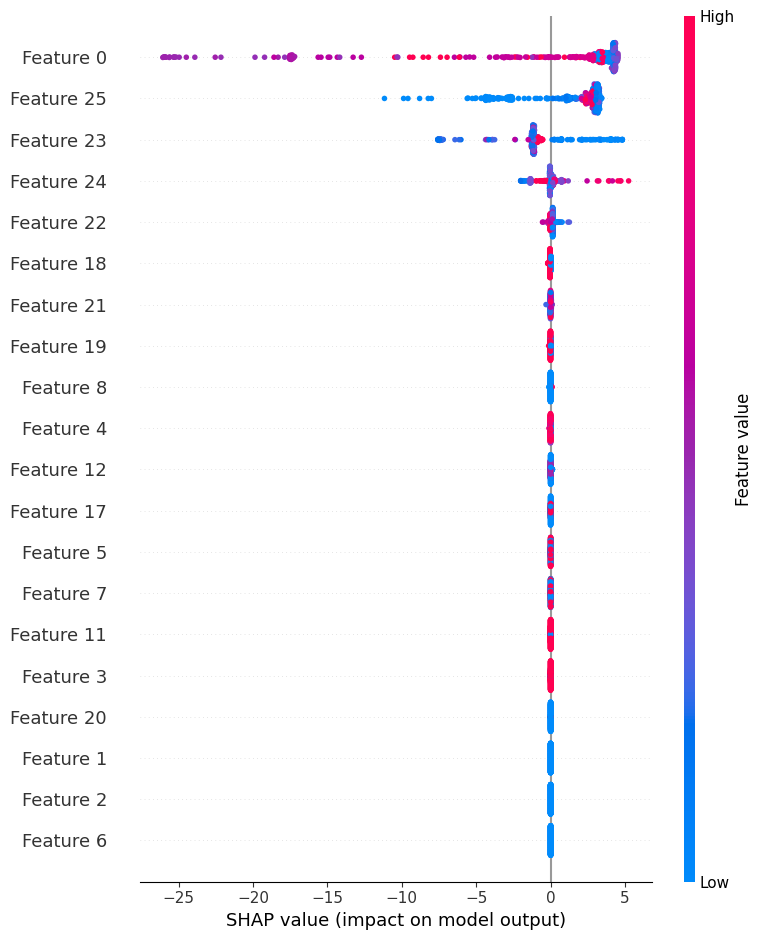

In [20]:
shap.summary_plot(shap_values, X_test)

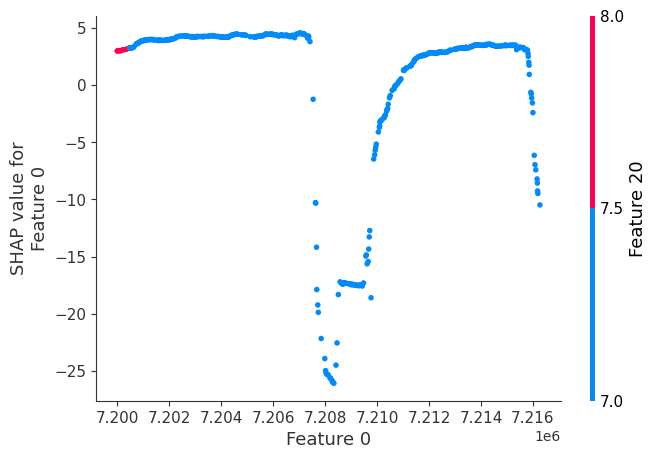

In [24]:
shap.dependence_plot("Feature 0", shap_values, X_test, interaction_index="Feature 20")